In [274]:
import pandas as pd
import matplotlib.pyplot as plt

#Read data
df = pd.read_csv("network_parent_child_resynced.csv")
df = df.fillna(0)
#df = df[df["device_type"] == "address"]
df = df.astype({"parent_id": int})
df

,geo_id,parent_id,lon,lat,device_type
0,931850954,931850931,-83.769628,32.649214,tap
1,947913811,947913797,-83.611769,32.513904,tap
2,955629271,955629222,-83.689435,32.615241,tap
3,930649907,930649874,-83.659642,32.804036,amplifier
4,930748661,930748430,-83.719664,32.829128,tap
...,...,...,...,...,...
205361,117085,931505136,-83.733518,32.750588,address
205362,116303,944523179,-83.737177,32.923341,address
205363,2088,931073235,-83.725696,32.874951,address
205364,36564475,931372350,-83.581811,32.883781,address


In [275]:
df[df["device_type"] == "address"]

,geo_id,parent_id,lon,lat,device_type
4052,2746,930715248,-83.719757,32.926887,address
4053,1882,930715636,-83.720908,32.926055,address
4054,71739,931463613,-83.691119,32.741464,address
4055,32777,931044494,-83.668253,32.867503,address
4056,2464,947902786,-83.605757,32.562583,address
...,...,...,...,...,...
205361,117085,931505136,-83.733518,32.750588,address
205362,116303,944523179,-83.737177,32.923341,address
205363,2088,931073235,-83.725696,32.874951,address
205364,36564475,931372350,-83.581811,32.883781,address


In [276]:
#Create list of all node ids
nodes = list(df["geo_id"])
temp = nodes
nodes = nodes + list(df["parent_id"])
nodes = list(set(nodes))
len(nodes)

205575

In [277]:
#Create list of edges for the full database
edges = []
for index, row in df.iterrows():
    edges = edges + [(row['parent_id'], row['geo_id'])]

edges

[(931850931, 931850954),
 (947913797, 947913811),
 (955629222, 955629271),
 (930649874, 930649907),
 (930748430, 930748661),
 (930643220, 930643260),
 (942245554, 942245569),
 (930950048, 930950081),
 (947912749, 947912757),
 (930607344, 930607352),
 (955629544, 955629554),
 (930368974, 930369006),
 (950261210, 950261223),
 (933052224, 933052249),
 (950265106, 950265123),
 (931631307, 931631313),
 (933046599, 933046636),
 (932482650, 932483772),
 (931541839, 931541848),
 (950264077, 950264087),
 (930373992, 930374013),
 (931230706, 931230724),
 (954830200, 954830213),
 (932316419, 932316432),
 (931130010, 931130020),
 (931127437, 931127451),
 (932315436, 932315451),
 (931130378, 931130396),
 (932316131, 932316139),
 (942480296, 942480312),
 (948629664, 948629675),
 (931568447, 931568450),
 (942764489, 942764514),
 (942477582, 942477629),
 (933049513, 933049525),
 (932011246, 932011267),
 (950264394, 950264411),
 (931631264, 931631275),
 (953540633, 953540642),
 (950263995, 950264027),


In [278]:
#Create graph database
import networkx as nx

G = nx.DiGraph() #Directed graph
G.add_nodes_from(nodes)

G.add_edges_from([(e[1], e[0]) for e in edges])

In [279]:
df2 = pd.read_csv("device_geo_data.csv")
df2

,geo_id,mac,node
0,89195,b0:7f:b9:6f:53:30,WR003
1,24444,38:3f:b3:55:6a:e6,H071A
2,41734735,00:1d:cd:6d:d3:6c,3VAW1
3,120317,c8:63:fc:ae:da:8d,MC172
4,40238,7c:26:34:11:ae:14,MC096
...,...,...,...
152907,127812,c0:c6:87:6d:11:13,H115A
152908,66881,5c:e3:0e:e9:f6:2e,MC037
152909,41942415,50:39:55:89:78:3e,WR028
152910,12343005,18:b8:1f:9f:57:39,WR036


In [280]:
#Selecting one node from all (MM106 is the node selected)
df2 = df2[df2["node"] == "MM106"]
df3 = df2.groupby('node')['geo_id'].apply(list)
test_ids = list(df3)[0]
test_ids

[120778,
 40498679,
 71444,
 385,
 13922,
 48388,
 113270,
 68426,
 47073,
 13486526,
 14970515,
 53905,
 110568,
 74257,
 41280543,
 13486534,
 13486517,
 110115,
 115348,
 998,
 41970508,
 47073,
 42674452,
 40884651,
 73734,
 108565,
 110112,
 48386,
 12617806,
 110569,
 47446,
 109894,
 41995626,
 3941,
 12598569,
 47257,
 41823902,
 42288669,
 64640,
 71356,
 43109261,
 47519,
 44026,
 42764282,
 62370,
 40916312,
 41796036,
 13486587,
 46372,
 48786,
 37063249,
 12617803,
 48618,
 42314775,
 65027,
 58139,
 73932,
 11577800,
 48600,
 110135,
 63321,
 74768,
 110560,
 108564,
 13486564,
 41493075,
 99994,
 13486526,
 110137,
 43018028,
 109365,
 42008121,
 74785,
 110548,
 73758,
 111007,
 71453,
 63321,
 120778,
 71991,
 12627259,
 109368,
 9548,
 5275,
 41293529,
 7480,
 36937042,
 57945,
 13486597,
 58230,
 42288669,
 42032194,
 110555,
 13486485,
 58555,
 3941,
 41824806,
 42288669,
 47446,
 67078,
 76288,
 13486585,
 40856448,
 12627267,
 13486562,
 42008121,
 110567,
 365723

In [281]:
len(test_ids)

620

In [282]:
#Calculating list of ancestors (This will be pre-calculated 
#and stored in a dictionary for the final implementation)

addresses = test_ids
ancestors = []
not_in = []
for node in addresses:
    try:
        preds = nx.bfs_predecessors(G, node)
        temp = [node]
        temp = temp + [n[0] for n in preds]
        ancestors = ancestors + [temp]
    except:
        not_in = not_in + [node]
    
ancestors

[[120778,
  931469658,
  931469647,
  931469635,
  931469629,
  931469603,
  931469157,
  931469148,
  931468813,
  931468810,
  931468806,
  931464160,
  0],
 [40498679,
  931469486,
  931469472,
  931469459,
  931469451,
  931469157,
  931469148,
  931468813,
  931468810,
  931468806,
  931464160,
  0],
 [385,
  931464340,
  931464218,
  931464211,
  931464203,
  931464169,
  931464163,
  931464160,
  0],
 [48388,
  931468628,
  931468448,
  931468442,
  931468428,
  931468289,
  931468281,
  931468272,
  931468001,
  931466027,
  931466023,
  931465901,
  931465760,
  931464203,
  931464169,
  931464163,
  931464160,
  0],
 [68426,
  931468069,
  931468039,
  931468024,
  931468001,
  931466027,
  931466023,
  931465901,
  931465760,
  931464203,
  931464169,
  931464163,
  931464160,
  0],
 [13486526,
  931471010,
  931471003,
  931470999,
  931470983,
  931470977,
  931470965,
  931470958,
  931470950,
  931470944,
  931470937,
  931470907,
  931470360,
  931470352,
  931470336,
 

In [283]:
#Number of devices in MM106 that dont have network parent child data associated with them
len(not_in)

141

In [302]:
#Code to find lca using Python set intersection
common_preds = set(ancestors[0])
for i in range(1,len(ancestors)):
    common_preds = common_preds.intersection(set(ancestors[i]))

lca = -1
for ele in ancestors[0]:
    if ele in common_preds:
        lca = ele
        break

lca

931464160

In [303]:
#Creating list of all nodes involved to make graph
all_nodes = []
for ele in ancestors:
    for ele2 in ele:
        if ele2 == lca:
            break
        if ele2 != 0:
            all_nodes = all_nodes + [ele2]
    
all_nodes = all_nodes + [lca]


len(all_nodes)
all_nodes = list(set(all_nodes))
len(all_nodes)

736

In [309]:
#Helper block for presentation
lens = []
for ele in ancestors:
    lens  = lens + [len(ele)]
    
sorted(lens)

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,

In [304]:
#Helper block
0 in all_nodes

False

In [323]:
#Creating color maps for each type of node
color_dict = {}
for node in all_nodes:
    try:
        temp = list(df[df["geo_id"] == node].values[0])
        color_dict[temp[0]] = temp[-1]
    except:
        print (node)

s = list(set(color_dict[ele] for ele in color_dict))
color_map = {}
colors = ["#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","red","blue","#D3D3D3","#90EE90","purple"]
for i in range(len(s)):
    color_map[s[i]] = colors[i]

for ele in color_dict:
    color_dict[ele] = color_map[color_dict[ele]]

color_map

{'power_block': '#D3D3D3',
 'tap': '#D3D3D3',
 'in_line_equalizer': '#D3D3D3',
 'power_inserter': '#D3D3D3',
 'address': 'red',
 'amplifier': 'blue',
 'internal_coupler': '#D3D3D3',
 'coaxial_splitter': '#90EE90',
 'optical_node': 'purple'}

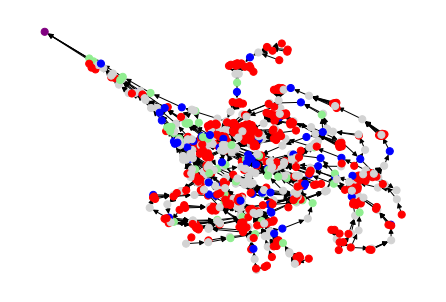

In [328]:
#Plotting the relevant subgraph
H = nx.subgraph(G, all_nodes)

color_map2 = [color_dict[node] for node in H]    
nx.draw(H, node_size=50,node_color=color_map2)